# Temperature Analysis
---
This notebook deals with the question whether the temperature has an effect on the voltage in our system and what the long term dependencies are during extensive profile runs

In [89]:
# library imports
import numpy as np
import matplotlib.pyplot as plt

### Long Runs 
Analyse the effect of temperature in long profile runs with several charge and discharge processes

In [90]:
# load inverter data
cur_inv = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/inverter/Inverter_Current.csv', delimiter=';')
# delete unnecessary data
cur_inv = cur_inv[0:-450000,:]

Text(0.5, 0.98, 'Ri Jumps 25A: Inverter Current')

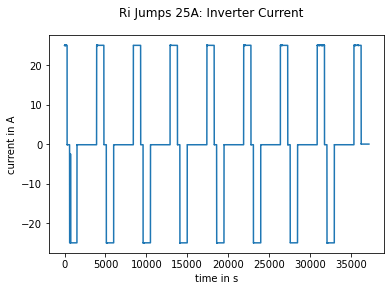

In [91]:
# normalize CAN time
cur_inv = cur_inv - [cur_inv[0,0],0]
# plot graph
plt.plot(cur_inv[:,0], cur_inv[:,1])
plt.xlabel('time in s')
plt.ylabel('current in A')
plt.suptitle('Ri Jumps 25A: Inverter Current')

In [92]:
# load cell temperature data
temp_slave_0 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')
# delete unnecessary data
temp_slave_0 = temp_slave_0[0:25000,:]
temp_slave_1 = temp_slave_1[0:25000,:]
temp_slave_2 = temp_slave_2[0:25000,:]
temp_slave_3 = temp_slave_3[0:25000,:]

Text(0.5, 0.98, 'Ri Jumps 25A: Slave Temperature')

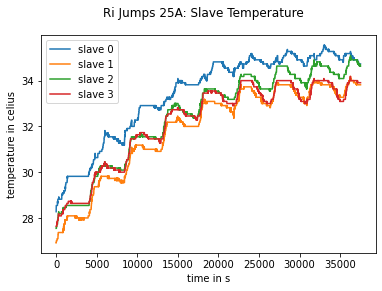

In [93]:
# compute average temperatures for each slave
temp_slave_0 = np.column_stack((temp_slave_0[:,0], np.mean(temp_slave_0[:, 1:temp_slave_0.shape[1]], axis=1)))
temp_slave_1 = np.column_stack((temp_slave_1[:,0], np.mean(temp_slave_1[:, 1:temp_slave_1.shape[1]], axis=1)))
temp_slave_2 = np.column_stack((temp_slave_2[:,0], np.mean(temp_slave_2[:, 1:temp_slave_2.shape[1]], axis=1)))
temp_slave_3 = np.column_stack((temp_slave_3[:,0], np.mean(temp_slave_3[:, 1:temp_slave_3.shape[1]], axis=1)))
# normalize CAN time
temp_slave_0 = temp_slave_0 - [temp_slave_0[0,0],0]
temp_slave_1 = temp_slave_1 - [temp_slave_1[0,0],0]
temp_slave_2 = temp_slave_2 - [temp_slave_2[0,0],0]
temp_slave_3 = temp_slave_3 - [temp_slave_3[0,0],0]
# plot graph
plt.plot(temp_slave_0[:,0], temp_slave_0[:,1], label="slave 0")
plt.plot(temp_slave_1[:,0], temp_slave_1[:,1], label="slave 1")
plt.plot(temp_slave_2[:,0], temp_slave_2[:,1], label="slave 2")
plt.plot(temp_slave_3[:,0], temp_slave_3[:,1], label="slave 3")
plt.legend()
plt.xlabel('time in s')
plt.ylabel('temperature in celius')
plt.suptitle('Ri Jumps 25A: Slave Temperature')

Text(0.5, 0.98, 'Slave 0 Temperature Gradient')

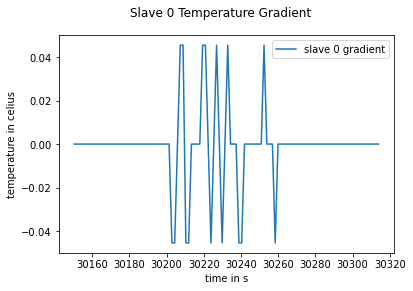

In [112]:
temp_grad_slave_0 = np.column_stack((temp_slave_0[:,0], np.gradient(temp_slave_0[:, 1:temp_slave_0.shape[1]].flatten())))
temp_grad_slave_0 = temp_grad_slave_0[20100:20210,:]
plt.plot(temp_grad_slave_0[:,0], temp_grad_slave_0[:,1], label="slave 0 gradient")
plt.legend()
plt.xlabel('time in s')
plt.ylabel('temperature in celius')
plt.suptitle('Slave 0 Temperature Gradient')